# Fashion-MNIST Image Classification

For this project we'll work with the <a href='https://www.kaggle.com/zalando-research/fashionmnist'>Fashion-MNIST</a> dataset, also available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. Like MNIST, this dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot


In this classification, we aim to correctly identify the object from a dataset of tens of thousands of images by using the Convolutional Neural Network(PyTorch)

# Import the Libraries

In [11]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import make_grid

 AS MY SYS DONT HAVE CUDA SUPPORTING GPU I WILL CODE ALONG THE VARIATIONS ALONE IN THE COMMENTS :    
 
 -use ``torch.cuda.is_available()`` to check the cuda version  
 
 -to know which cuda device ``torch.cuda.current_device()``  
 
 -to know the current memory occupied in cuda ``torch.cuda.memory_allocated()``  
 
 -use the below code to assign the cuda device for the entire processing  
 
 ``device= torch.device("cuda:0" if torch.cuda.is_available() else "cpu")``

## Loading the Dataset from TorchVision

In [2]:
from torchvision import datasets, transforms
transform = transforms.ToTensor()

In [3]:
train_data = datasets.FashionMNIST(root='', train=True, download=True, transform=transform)
train_data

Extracting FashionMNIST\raw\train-images-idx3-ubyte.gz to FashionMNIST\raw


Extracting FashionMNIST\raw\train-labels-idx1-ubyte.gz to FashionMNIST\raw


Extracting FashionMNIST\raw\t10k-images-idx3-ubyte.gz to FashionMNIST\raw


Extracting FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to FashionMNIST\raw
Processing...
Done!


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [5]:
len(train_data)

60000

In [6]:
test_data = datasets.FashionMNIST(root='', train=False, download=True, transform=transform)
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
image, label = train_data[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([1, 28, 28]) 
Label: 9


From the above result we can see that the dimension of the image is ``1 x 28x 28`` which indicates that the ``height = 28``, ``widith  = 28`` and ``color channel is 1`` which is black and white

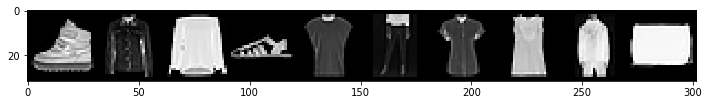

In [12]:
for images,labels in train_loader: 
    break

im = make_grid(images, nrow=10)
plt.figure(figsize=(12,4))

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

# Data Loading Strategy

As there are more than 30k rows its not wise to feed all the data once into the CNN model. Instead we will try to feed the data in batches to the model using Dataset and DataLoader feature of Torch library

In [8]:
from torch.utils.data import TensorDataset, DataLoader

In [9]:
"""
Initializing train/test dataloader object which splits the training dataset into small batches of 10 images each
and this can be used later in the CNN model  
"""
torch.manual_seed(101)
bat_sz=10
train_loader = DataLoader(train_data,batch_size=bat_sz,shuffle=True) #use pin_memory=True in the parameters after shuffle to change to cuda
test_loader = DataLoader(test_data,batch_size=bat_sz,shuffle=False) #use pin_memory=True in the parameters after shuffle to change to cuda

In [13]:
class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

# Define the CNN Model

In [14]:
class CONVNN(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.conv1  = nn.Conv2d(1, 10 , 3 , 1, padding=1)# We will ne using 3X3 filter/kernel and stride of 1 with padding of size 1 as MNIST images re centered and don't have any info at the border/edges
        self.conv2  = nn.Conv2d(10, 16, 3 , 1,padding=1)
        self.layer1 = nn.Linear(16*7*7,120) # we need to calculate the resulting number of matrices passing thru the conv layer and put that corressponding o/p as the linear layer input
        self.layer2 = nn.Linear(120,84)
        self.layer3 = nn.Linear(84,10)
        
    def forward(self,x):
        
        x= F.max_pool2d(  F.relu(self.conv1(x)) , 2, 2) #adding relu and max pooling the same line
        x= F.max_pool2d(  F.relu(self.conv2(x)) , 2, 2) #adding relu and max pooling the same line
        x= F.relu(self.layer1(x.view(-1,16*7*7))) #flattening by using View and no dropout has been added
        x= F.relu(self.layer2(x))
        x= F.log_softmax(self.layer3(x),dim=1) #multiclass classificaiton
        
        return x
    

### How the input parameters for the linear layer is calcualted:    
At first we have 28X28 image which was filtered by 3x3 kernel as we do have padding so the last 2 pixels will be 
scanned thus the resulting image of the kernel will be (28)X(28)then it is passed to the max_pool where it reduced half or what was there before hence the output
will be  (28/2 X 28/2) = (14X14) then again we will have a conv layer which is scanned by a 3X3 kernel then max pooling occurs so ( 14/2 X 14/2) = (7X7). finally the input layer of Linear will take 56X56 matrix of image with the number of conv layers just
before the linear layer is 16 = > 16 * 7 * 7

Padding will be calculated P= (K-1)/2 Where K is the Kernel's filter size  

here, k=3 so P = (3-1)/2 = 1

In the above model, due to my computer limitations, i stopped at just 2 Convolutional layers, 2 Pooling layers and 2 Fully connected layers but we can add as much as we want to increase the accuracy of the model

In [15]:
torch.manual_seed(101)
model = CONVNN()#to instansiate the model as cuda use "model = CONVNN().to(device) " or "model.cuda()" so that whatever the tensors we are passing to the model will be saved in GPU and operations will be performed on that
model

CONVNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (layer1): Linear(in_features=784, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=84, bias=True)
  (layer3): Linear(in_features=84, out_features=10, bias=True)
)

# Define Loss and Optimizer

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

# Training the CNN Model

In [17]:
epochs = 9
train_loss= []
test_loss= []
train_acc=[]
test_acc = []

print(f'\nConvolutional Neural Network Model Metrics:\n')
print(f'\t This CNN model configuration has {epochs} epochs with each batch size of {bat_sz} images:\n')
for i in range(epochs):
    
    train_crt_pred = 0
    test_crt_pred = 0
    conf_mat= torch.FloatTensor([])
    
    for b,(x_train,y_train) in enumerate (train_loader):
        b += 1
        y_pred = model.forward(x_train)
        loss= criterion(y_pred,y_train)
        
        buffer = torch.max(y_pred.data, 1) [1]
        batch_acc = (buffer == y_train).sum()
        train_crt_pred +=  batch_acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
                
        if b% int((len(train_data)/bat_sz)/5 )  == 0:
            print(f'Epoch{i+1:2} Batch {b:4} loss: {loss.item():5.2f} Train Accuracy: {train_crt_pred.item()*100/(bat_sz*b):6.3f}%')
    
    train_loss.append(loss)  #loss after 1 epoch
    train_acc.append(train_crt_pred) # crt predictions after 1 epoch
    
    
    with torch.no_grad():  #testing after 1 complete epoch
        for b,(x_test,y_test) in enumerate (test_loader):
            b += 1
            y_eval = model.forward(x_test)
            loss= criterion(y_eval,y_test)
            buffer1 = torch.max(y_eval.data, 1) [1]
            conf_mat =  torch.cat((conf_mat.float(),buffer1.float()),0)
            batch_acc = (buffer1 == y_test).sum()
            test_crt_pred +=  batch_acc
    
    test_loss.append(loss) #test loss after the last completed epoch
    test_acc.append(test_crt_pred) # crt predictions using the last completed epoch

    print(f'After {i+1} Epoch(s) the Train Accuracy is {(train_crt_pred.item()/len(train_data))*100:6.3f}% and Test Accuracy is {(test_crt_pred.item()/len(test_data))*100:6.3f}% \n')     
    
        


Convolutional Neural Network Model Metrics:

	 This CNN model configuration has 9 epochs with each batch size of 10 images:

Epoch 1 Batch 1200 loss:  0.07 Train Accuracy: 72.425%
Epoch 1 Batch 2400 loss:  0.27 Train Accuracy: 77.562%
Epoch 1 Batch 3600 loss:  0.06 Train Accuracy: 80.158%
Epoch 1 Batch 4800 loss:  0.73 Train Accuracy: 81.677%
Epoch 1 Batch 6000 loss:  0.27 Train Accuracy: 82.850%
After 1 Epoch(s) the Train Accuracy is 82.850% and Test Accuracy is 87.220% 

Epoch 2 Batch 1200 loss:  0.24 Train Accuracy: 87.992%
Epoch 2 Batch 2400 loss:  0.12 Train Accuracy: 88.250%
Epoch 2 Batch 3600 loss:  0.05 Train Accuracy: 88.528%
Epoch 2 Batch 4800 loss:  0.43 Train Accuracy: 88.567%
Epoch 2 Batch 6000 loss:  0.33 Train Accuracy: 88.808%
After 2 Epoch(s) the Train Accuracy is 88.808% and Test Accuracy is 88.550% 

Epoch 3 Batch 1200 loss:  0.18 Train Accuracy: 89.758%
Epoch 3 Batch 2400 loss:  0.66 Train Accuracy: 89.900%
Epoch 3 Batch 3600 loss:  0.40 Train Accuracy: 90.119%
Epo

# Model Evaluation

In [20]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns


The Confusion Matrix is plotted below:


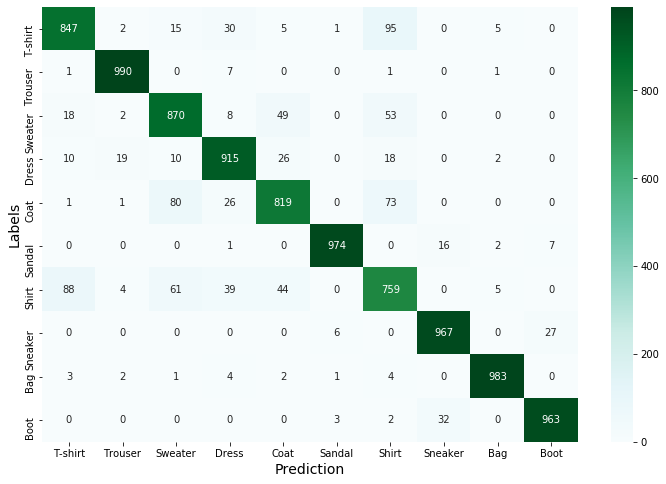


The Classification Report is plotted below: 

               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      1000
         1.0       0.97      0.99      0.98      1000
         2.0       0.84      0.87      0.85      1000
         3.0       0.89      0.92      0.90      1000
         4.0       0.87      0.82      0.84      1000
         5.0       0.99      0.97      0.98      1000
         6.0       0.76      0.76      0.76      1000
         7.0       0.95      0.97      0.96      1000
         8.0       0.98      0.98      0.98      1000
         9.0       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [23]:
print('\nThe Confusion Matrix is plotted below:')
cfmt =pd.DataFrame(confusion_matrix(torch.Tensor([r for q,r in test_data]).reshape(-1,1),conf_mat.reshape(-1,1),labels=[0,1,2,3,4,5,6,7,8,9]),index=class_names,columns=class_names)
plt.figure(figsize=(12,8))
sns.heatmap(cfmt,annot=True,cmap='BuGn',fmt="d")
plt.xlabel("Prediction",fontsize=14)
plt.ylabel("Labels",fontsize=14)
plt.show()
print('\nThe Classification Report is plotted below: \n\n',classification_report(torch.Tensor([r for q,r in test_data]).reshape(-1,1),conf_mat.reshape(-1,1)))


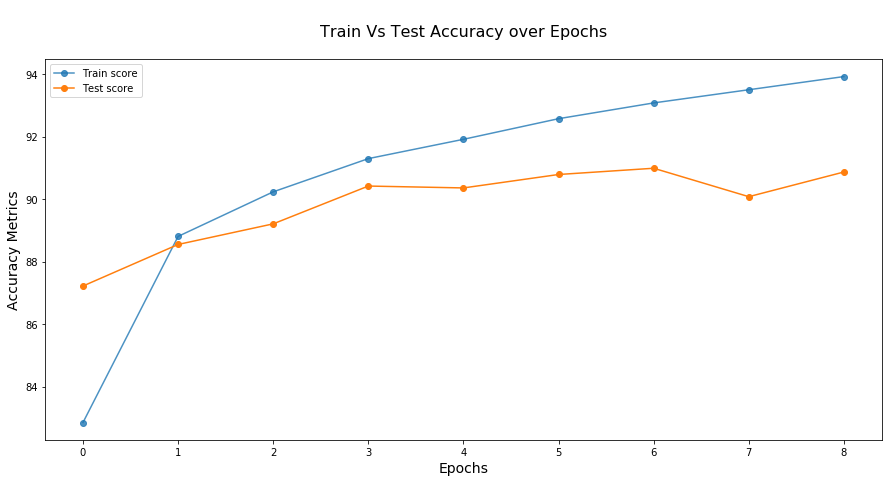

In [24]:
plt.figure(figsize=(15,7))
plt.plot([(t/(len(train_data)/100)) for t in train_acc], label='Train score',marker='o',alpha=0.8)
plt.plot([(t/(len(test_data)/100)) for t in test_acc], label='Test score',marker='o')
plt.title('\nTrain Vs Test Accuracy over Epochs\n',fontsize=16)
# plt.xticks(np.arange(0,20,1));
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy Metrics',fontsize=14)
plt.legend();

From above we can see that, at the epoch 8 we have better Test results hence it is wise to stop the training at 8th epoch 

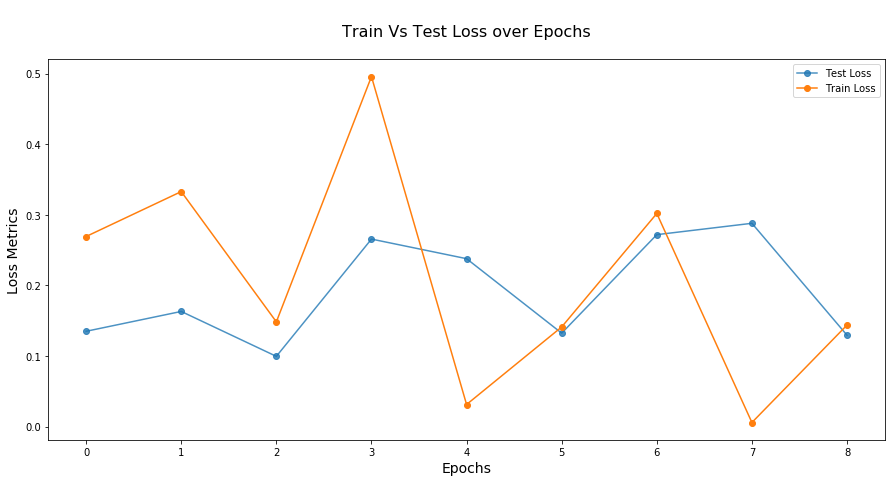

In [25]:
plt.figure(figsize=(15,7))
plt.plot([t for t in test_loss], label='Test Loss',marker='o',alpha=0.8)
plt.plot([t for t in train_loss], label='Train Loss',marker='o')
plt.title('\nTrain Vs Test Loss over Epochs\n',fontsize=16)
# plt.xticks(np.arange(0,20,1));
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss Metrics',fontsize=14)
plt.legend();

# Save the Model

In [26]:
torch.save(model.state_dict(), 'FASHION_MNIST_CNN.pt')